In [14]:
import matplotlib.pyplot as plt
from random import randint
from random import choices
from itertools import permutations

Código referente ao algoritmo genético


In [15]:
#----------------------------------------------- Codigos para criação do tabuleiro -------------------------------------------------------------------------


# O tabuleiro será representado por uma lista de tamanho = "número de rainhas". Cada elemento da lista poderá ir de zero há "número de rainhas - 1"
def criaTabuleiro(numeroDeRainhas):
        tabuleiro = []
        for i in range(0, numeroDeRainhas):
            tabuleiro.append(randint(0, numeroDeRainhas - 1))
     
        return tabuleiro

#Codigo para criar um conjunto de tabuleiros
def criaPopulacaoDeTabuleiros(tamanhoPopulacao, numeroDeRainhas):
    populacaoDeTabuleiros = []
    for i in range (0,numeroDeRainhas):
        populacaoDeTabuleiros.append(criaTabuleiro(numeroDeRainhas))
    return populacaoDeTabuleiros

def criaPopulacaoDeTabuleirosBinarios(tamanhoPopulacao,numeroDeRainhas, formatoBinario):
    populacaoDeTabuleirosBinarios = []
    populacaoDeTabuleiros = criaPopulacaoDeTabuleiros(tamanhoPopulacao,numeroDeRainhas)

    for tabuleiro in populacaoDeTabuleiros:
        populacaoDeTabuleirosBinarios.append(conversorParaRepresentacaoBinaria(tabuleiro,formatoBinario))

    return populacaoDeTabuleirosBinarios


def criaPopulacaoDeTabuleirosPermutados(numeroDeRainhas):
    tabuleiroInicial = []
    populacaoFinal = []

    for i in range(0, numeroDeRainhas):
        tabuleiroInicial.append(i)
    
    vetorIntermediario = list(permutations(tabuleiroInicial))



    for tabuleiro in vetorIntermediario:
        populacaoFinal.append(list(tabuleiro))

    print(populacaoFinal)
    return populacaoFinal


In [16]:
#---------------------------------------------------------------- Trabalhando com Binário --------------------------------------------------------

#A representação na forma binária será passando cada número do tabuleiro para binário, como exemplo, em um tabuleiro 4 X 4 temos:
# [1,3,1,4] => '0001001100010100
#   Para trabalhar com binários, será necessário deixar explícito o formato deste binário, por exemplo, 1 pode ser representado pelo binário 1, porém, 4 será representado pelo binário 100.
# Para que a mutação mantenha o tamanho do tabuleiro, será necessário padronizar a representação binária de acordo com o número de rainhas no tabuleiro.
# Por exemplo, um tabuleiro com tamanho entre 0 a 15 rainhas pode ser representado em um tamanho de 4 caracteres. Ou seja, o número 1 será em binário 0001
# e o número 8 será em binário 1000.

# Dado um número de rainhas, retorna o formato adequado para representar o número em binário
def buscaFormatoRepresentacaoBinaria(numeroDeRainhas):
    if( numeroDeRainhas == 4):
        return '02b'
    if( numeroDeRainhas == 8 ):
        return '03b'
    if( numeroDeRainhas == 16):
        return '04b'
    else:
        return '05b'

# Dado um tabuleiro em lista, retorna o mesmo na forma binária
def conversorParaRepresentacaoBinaria(tabuleiro, formatoBinario):
    tabuleiroEmBinario = ''

    for rainha in tabuleiro:
        tabuleiroEmBinario = tabuleiroEmBinario + format(rainha, formatoBinario)
    return tabuleiroEmBinario

In [17]:
#---------------------------------------------------------------- Trabalhando com Lista --------------------------------------------------------


# Dado um tabuleiro em binário, retorna na forma de lista
def conversorParaRepresetacaoDeLista (tabuleiroEmBinario, formatoBinario):
    tamanhoDoPasso = int(formatoBinario[1])
        
    tabuleiro = []

    posicaoPonteiroDoConversor = 2

    for i in range(0,len(tabuleiroEmBinario) , tamanhoDoPasso):
        posicaoPonteiroDoConversor = i + tamanhoDoPasso
        tabuleiro.append( int(tabuleiroEmBinario[i:posicaoPonteiroDoConversor] , 2))
    
    return tabuleiro

In [18]:
#----------------------------------------------- Busca Números de Ataques -------------------------------------------------------------------------

# Como a heurística é baseada em números de ataques. Esta função retorna quantos ataques são possíveis no tabuleiro
def buscarNumeroDeAtaquesNoTabuleiro(tabuleiro):
    numeroDeAtaques = buscarNumeroDeAtaquesNaHorizontal(tabuleiro) + buscarNumeroDeAtaquesNoNordeste(tabuleiro) + buscarNumeroDeAtaquesNoSudeste(tabuleiro) 
    return numeroDeAtaques

# Para cada rainha no tabuleiro, busca quantos ataques são possíveis na horizontal
def buscarNumeroDeAtaquesNaHorizontal(tabuleiro):
    return buscarNumeroDeAtaquesNaDireita(tabuleiro) 

# Para cada rainha no tabuleiro, busca quantos ataques são possíveis
def buscarNumeroDeAtaquesNaDireita(tabuleiro):
    numeroDeAtaques = 0

    for posicaoRainha in range (0,len(tabuleiro)):
        for possivelAtaqueNaDireita in range (posicaoRainha,len(tabuleiro)):
            if possivelAtaqueNaDireita == posicaoRainha:
                continue 

            elif tabuleiro[posicaoRainha] == tabuleiro[possivelAtaqueNaDireita]:
                numeroDeAtaques += 1 
                break           
    return numeroDeAtaques

# Analisa o tabuleiro no sentido nordeste de cada rainha, contando o número de ataques possíveis
def buscarNumeroDeAtaquesNoNordeste(tabuleiro):
    numeroDeAtaques = 0

    for posicaoRainha in range (0,len(tabuleiro)):
        mapeiaDiagonal = tabuleiro[posicaoRainha]
        for posicaoHorizontal in range (posicaoRainha + 1, len(tabuleiro)):
            mapeiaDiagonal -= 1

            if tabuleiro[posicaoHorizontal] == mapeiaDiagonal:
                numeroDeAtaques += 1
                break
    return numeroDeAtaques

# Analisa o tabuleiro no sentido sudeste de cada rainha, contando o número de ataques possíveis
def buscarNumeroDeAtaquesNoSudeste(tabuleiro):
    numeroDeAtaques = 0

    for posicaoRainha in range (0,len(tabuleiro)):
        mapeiaDiagonal = tabuleiro[posicaoRainha]
        for posicaoHorizontal in range (posicaoRainha + 1, len(tabuleiro)):
            mapeiaDiagonal += 1

            if tabuleiro[posicaoHorizontal] == mapeiaDiagonal:
                numeroDeAtaques += 1
                break
    return numeroDeAtaques

In [19]:
#----------------------------------------------- Avaliação População em BInário -------------------------------------------------------------------------

# Função para avalias o tabuleiro no formato binário.
def avaliaTabuleiroEmBinario(tabuleiroEmBinario, formatoBinario):
    return buscarNumeroDeAtaquesNoTabuleiro(conversorParaRepresetacaoDeLista(tabuleiroEmBinario,formatoBinario))

# Função para avaliar uma população de tabuleiros, retorna uma lista com as avaliações do tabuleiro na mesma ordem dos elementos dos tabuleiros e o melhor tabuleiro.
def avaliaPopulacao(tabuleiros):
    avaliacaoDeElementosDaPopulacao = []
    melhorAvaliacao = -1000
    melhorTabuleiro = []

    for tabuleiro in tabuleiros:
        avaliacao =  buscarNumeroDeAtaquesNoTabuleiro(tabuleiro) * (-1) 
        if(avaliacao > melhorAvaliacao):
            melhorAvaliacao = avaliacao
            melhorTabuleiro = tabuleiro
        avaliacaoDeElementosDaPopulacao.append( avaliacao )
    
    return [avaliacaoDeElementosDaPopulacao, melhorTabuleiro, melhorAvaliacao]

def avaliaPopulacaoDeTabuleirosBinarios(tabuleiros, formatoBinario):
    avaliacaoDeElementosDaPopulacao = []
    melhorAvaliacao = -1000
    melhorTabuleiro = []

    for tabuleiro in tabuleiros:
        avaliacao =  avaliaTabuleiroEmBinario(tabuleiro,formatoBinario) * (-1) 
        if(avaliacao > melhorAvaliacao):
            melhorAvaliacao = avaliacao
            melhorTabuleiro = tabuleiro
        avaliacaoDeElementosDaPopulacao.append( avaliacao )
    
    return [avaliacaoDeElementosDaPopulacao, melhorTabuleiro, melhorAvaliacao]

In [20]:
#----------------------------------------------- Elementos da Populaçao por peso -------------------------------------------------------------------------

# Dada uma populção A de tabuleiros, retorna uma população B baseada na seleção por peso de tabuleiros de A e o melhor tabuleiro. 
# Simulando a fase de seleção do  algoritmo genético
def selecionaElementosNaPopulacaoPorPeso(tabuleiros,tamanhoDaPopulacao , elitismo, formatoBinario):
    if(formatoBinario == ''):
        resultadoAvaliacoes = avaliaPopulacao(tabuleiros)
    
    if(formatoBinario != ''):
        resultadoAvaliacoes = avaliaPopulacaoDeTabuleirosBinarios(tabuleiros, formatoBinario)
    
    listaDeAvaliacoes = resultadoAvaliacoes[0]
    melhorTabuleiro = resultadoAvaliacoes[1]
    melhorAvaliacao = resultadoAvaliacoes[2]
    mediaDasAvaliacoes = sum(listaDeAvaliacoes)/len(listaDeAvaliacoes)

    minimoDaLista = min(listaDeAvaliacoes)

    listaDePesos = []
    if(minimoDaLista == 0):
        return [tabuleiros, melhorTabuleiro, melhorAvaliacao , True, mediaDasAvaliacoes]

    if (elitismo == False):
        for avaliacao in listaDeAvaliacoes:
            pesoNormalizado = ((avaliacao - minimoDaLista) / (0 - minimoDaLista)) 
            listaDePesos.append(pesoNormalizado)

        return [choices(tabuleiros, weights = listaDePesos, k = tamanhoDaPopulacao ), melhorTabuleiro, melhorAvaliacao, False, mediaDasAvaliacoes]
    else:
        for avaliacao in listaDeAvaliacoes:
            pesoNormalizado = ((avaliacao - minimoDaLista) / (0 - minimoDaLista)) 
            listaDePesos.append(pesoNormalizado)

        return [choices(tabuleiros, weights = listaDePesos, k = tamanhoDaPopulacao - 1 ), melhorTabuleiro, melhorAvaliacao, False, mediaDasAvaliacoes]

In [21]:
#----------------------------------------------- Codigos para realizar metodos geneticos -------------------------------------------------------------------------


# Função para realizar crossover de dois tabuleiros
def realizaCrossover( tabuleiroA, tabuleiroB ):
    pontoDeCrossover = randint(1, len(tabuleiroA) - 1)
    
    return [tabuleiroA[0:pontoDeCrossover] + tabuleiroB[pontoDeCrossover:] , tabuleiroB[0:pontoDeCrossover] + tabuleiroA[pontoDeCrossover:]]

# Função para realizar mutacao de um tabuleiro
def realizaMutacao( tabuleiro ):
    pontoDeMutacao = randint(0, len(tabuleiro)-1)
    tabuleiro[pontoDeMutacao] = randint(0, len(tabuleiro)-1)
    return tabuleiro

# Função para realizar mutacao de um tabuleiro em binário
def realizaMutacaoDeTabuleiroBinario( tabuleiroEmBinario ):
    listaDeCharDoTabuleiro = list(tabuleiroEmBinario)

    pontoDeMutacao = randint(0, len(tabuleiroEmBinario)-1)
    if(listaDeCharDoTabuleiro[pontoDeMutacao] == '0' ):
        listaDeCharDoTabuleiro[pontoDeMutacao] = '1'
    else:
        listaDeCharDoTabuleiro[pontoDeMutacao] = '0'
    
    tabuleiroReconstruido = ''
    for char in listaDeCharDoTabuleiro:
        tabuleiroReconstruido = tabuleiroReconstruido + char
    return tabuleiroReconstruido

In [22]:
#----------------------------------------------- Codigos que vai realizar os métodos genéticos -------------------------------------------------------------------------

def vaiRealizarCrossover(probabilidadeDeCrossover):
    saida = choices([True,False],[probabilidadeDeCrossover, 1 - probabilidadeDeCrossover ], k = 1)
    return saida[0]

def vaiRealizarMutacao(probabilidadeDeMutacao):
    saida = choices([True,False],[probabilidadeDeMutacao, 1 - probabilidadeDeMutacao ], k = 1)
    return saida[0]


In [23]:
def algoritmoGenetico(tamanhoDaPopulacao, numeroDeRainhas, numeroDeGeracoes, probabilidadeDeCrossover, probabilidadeDeMutacao, elitismo, populacaoPermutada):
    
    if(populacaoPermutada):
      populacao = criaPopulacaoDeTabuleirosPermutados(numeroDeRainhas)
      tamanhoDaPopulacao = numeroDeRainhas
    
    else:
      populacao = criaPopulacaoDeTabuleiros(tamanhoDaPopulacao,numeroDeRainhas)

    melhorTabuleiroAtual = []
    melhorAvaliacaoAtual = 1000
    vetorGeracao = []
    vetorMelhoresAvaliacoes = []
    vetorMediaAvaliacoes = []

    for geracao in range(0, numeroDeGeracoes):
        elementosSelecionados = selecionaElementosNaPopulacaoPorPeso(populacao, tamanhoDaPopulacao, elitismo,'')
        
        melhorAvaliacaoAtual = elementosSelecionados[2]
        melhorTabuleiroAtual = elementosSelecionados[1]

        vetorGeracao.append(geracao)
        vetorMelhoresAvaliacoes.append(elementosSelecionados[2])
        vetorMediaAvaliacoes.append(elementosSelecionados[4])

        if (elementosSelecionados[3] == True):
            print("Solução encontrada")
            break

        populacaoIntermediaria = elementosSelecionados[0]

        if(vaiRealizarCrossover( probabilidadeDeCrossover )):
            populacaoEmCrossover = []

            for i in range (0, len(populacaoIntermediaria), 2):
                if( i + 1 >= len(populacaoIntermediaria)):
                    break
                
                for populacao in realizaCrossover(populacaoIntermediaria[i], populacaoIntermediaria[i+1]):
                    populacaoEmCrossover.append(populacao)

            populacaoIntermediaria = populacaoEmCrossover

        if(vaiRealizarMutacao( probabilidadeDeMutacao )):
            for i in range(0 , len(populacaoIntermediaria)):
                populacaoIntermediaria[i] = realizaMutacao(populacaoIntermediaria[i])
    
        if(elitismo):
            populacaoIntermediaria.append(elementosSelecionados[1])    

        populacao = populacaoIntermediaria
    
    print("\nGeração X Melhores avaliações")
    plt.plot(vetorGeracao,vetorMelhoresAvaliacoes)
    plt.show()

    print("\nGeração X Média das avaliações de cada geração")
    plt.plot(vetorGeracao,vetorMediaAvaliacoes)
    plt.show()

    print(populacao)
    print("O melhor tabuleiro da geração foi:" )
    print(melhorTabuleiroAtual)
    print("Com avaliação: " + str(melhorAvaliacaoAtual))
    return populacao



In [24]:
def algoritimoGeneticoBinario(tamanhoDaPopulacao, numeroDeRainhas, numeroDeGeracoes, probabilidadeDeCrossover, probabilidadeDeMutacao, elitismo):
    formatoBinario = buscaFormatoRepresentacaoBinaria(numeroDeRainhas)

    populacao = criaPopulacaoDeTabuleirosBinarios(tamanhoDaPopulacao,numeroDeRainhas,formatoBinario)

    melhorTabuleiroAtual = []
    melhorAvaliacaoAtual = 10
    vetorGeracao = []
    vetorMelhoresAvaliacoes = []
    vetorMediaAvaliacoes = []

    for geracao in range(0,numeroDeGeracoes):
        elementosSelecionados = selecionaElementosNaPopulacaoPorPeso(populacao, tamanhoDaPopulacao, elitismo,formatoBinario)
        melhorAvaliacaoAtual = elementosSelecionados[2]
        melhorTabuleiroAtual = elementosSelecionados[1]

        vetorGeracao.append(geracao)
        vetorMelhoresAvaliacoes.append(elementosSelecionados[2])
        vetorMediaAvaliacoes.append(elementosSelecionados[4])

        if (elementosSelecionados[3] == True):
            print("Solução encontrada")
            break

        populacaoIntermediaria = elementosSelecionados[0]

        if(vaiRealizarCrossover( probabilidadeDeCrossover )):
            populacaoEmCrossover = []

            for i in range (0, len(populacaoIntermediaria), 2):
                if( i + 1 >= len(populacaoIntermediaria)):
                    break
                
                for populacao in realizaCrossover(populacaoIntermediaria[i], populacaoIntermediaria[i+1]):
                    populacaoEmCrossover.append(populacao)

            populacaoIntermediaria = populacaoEmCrossover

        if(vaiRealizarMutacao( probabilidadeDeMutacao )):
            for i in range(0 , len(populacaoIntermediaria)):
                populacaoIntermediaria[i] = realizaMutacaoDeTabuleiroBinario(populacaoIntermediaria[i])
    
        if(elitismo):
            populacaoIntermediaria.append(elementosSelecionados[1])    

        populacao = populacaoIntermediaria
    
    print("\nGeração X Melhores avaliações")
    plt.plot(vetorGeracao,vetorMelhoresAvaliacoes)
    plt.show()

    print("\nGeração X Média das avaliações de cada geração")
    plt.plot(vetorGeracao,vetorMediaAvaliacoes)
    plt.show()

    print(populacao)
    print("O melhor tabuleiro da geração foi:" )
    print(conversorParaRepresetacaoDeLista(melhorTabuleiroAtual,formatoBinario))
    print("Com avaliação: " + str(melhorAvaliacaoAtual))
    return populacao



[[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 7, 6], [0, 1, 2, 3, 4, 6, 5, 7], [0, 1, 2, 3, 4, 6, 7, 5], [0, 1, 2, 3, 4, 7, 5, 6], [0, 1, 2, 3, 4, 7, 6, 5], [0, 1, 2, 3, 5, 4, 6, 7], [0, 1, 2, 3, 5, 4, 7, 6], [0, 1, 2, 3, 5, 6, 4, 7], [0, 1, 2, 3, 5, 6, 7, 4], [0, 1, 2, 3, 5, 7, 4, 6], [0, 1, 2, 3, 5, 7, 6, 4], [0, 1, 2, 3, 6, 4, 5, 7], [0, 1, 2, 3, 6, 4, 7, 5], [0, 1, 2, 3, 6, 5, 4, 7], [0, 1, 2, 3, 6, 5, 7, 4], [0, 1, 2, 3, 6, 7, 4, 5], [0, 1, 2, 3, 6, 7, 5, 4], [0, 1, 2, 3, 7, 4, 5, 6], [0, 1, 2, 3, 7, 4, 6, 5], [0, 1, 2, 3, 7, 5, 4, 6], [0, 1, 2, 3, 7, 5, 6, 4], [0, 1, 2, 3, 7, 6, 4, 5], [0, 1, 2, 3, 7, 6, 5, 4], [0, 1, 2, 4, 3, 5, 6, 7], [0, 1, 2, 4, 3, 5, 7, 6], [0, 1, 2, 4, 3, 6, 5, 7], [0, 1, 2, 4, 3, 6, 7, 5], [0, 1, 2, 4, 3, 7, 5, 6], [0, 1, 2, 4, 3, 7, 6, 5], [0, 1, 2, 4, 5, 3, 6, 7], [0, 1, 2, 4, 5, 3, 7, 6], [0, 1, 2, 4, 5, 6, 3, 7], [0, 1, 2, 4, 5, 6, 7, 3], [0, 1, 2, 4, 5, 7, 3, 6], [0, 1, 2, 4, 5, 7, 6, 3], [0, 1, 2, 4, 6, 3, 5, 7], [0, 1, 2, 4, 6, 3, 7, 5], [0, 1, 2, 4

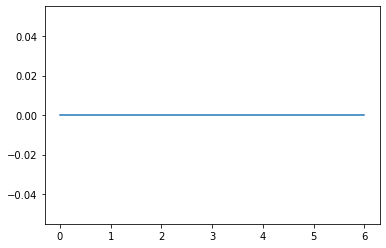


Geração X Média das avaliações de cada geração


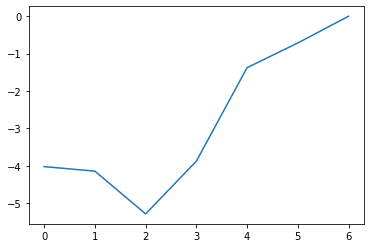

[[0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3], [0, 4, 7, 5, 2, 6, 1, 3]]
O melhor tabuleiro da geração foi:
[0, 4, 7, 5, 2, 6, 1, 3]
Com avaliação: 0


[[0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3],
 [0, 4, 7, 5, 2, 6, 1, 3]]

In [25]:
# 8 Rainhas
algoritmoGenetico( 4, 8, 1500, 0.8,0.2, True, True)
#algoritimoGeneticoBinario(8, 8, 1000, 0.8,0.2, True)